**In-class activity N°2**

Group 2:

* Andrea Franco
* Andres Salguero
* Harpreet Kaur

# Libraries

In [33]:
import pandas as pd
import numpy as np
from sklearn import linear_model

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

## IV) Data Extraction

As the dataset has already been characterized, identified and acquired, we start the data lifecycle from the Data extraction.

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/class-activities/data_activity2.csv")
df

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.000000,0,1401,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.000000,0,1,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.000000,50,328,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.000000,0,0,438.97,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973



## Step V : Data Validation and Cleansing
 For this we will check for null functions in our dataset using isnull function() and also check for unique values using unique function.

In [20]:
df.isnull().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

### Checking for unique values:

In [21]:
df.nunique()

symbol                     1
exchange                   1
date                      21
adjusted close            21
option symbol          13960
expiration                48
strike                   312
call/put                   2
style                      1
ask                    22926
bid                    22611
mean price             36172
iv                    146910
volume                  6205
open interest          14825
stock price for iv        21
*                          1
delta                 182814
vega                  179397
gamma                  28374
theta                  91796
rho                   183742
dtype: int64

### Dropping all the columns with only one unique value:


In [22]:
df = df.loc[:, df.nunique() > 1]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221046 entries, 0 to 221045
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                221046 non-null  object 
 1   adjusted close      221046 non-null  float64
 2   option symbol       221046 non-null  object 
 3   expiration          221046 non-null  object 
 4   strike              221046 non-null  float64
 5   call/put            221046 non-null  object 
 6   ask                 221046 non-null  float64
 7   bid                 221046 non-null  float64
 8   mean price          221046 non-null  float64
 9   iv                  221046 non-null  float64
 10  volume              221046 non-null  int64  
 11  open interest       221046 non-null  int64  
 12  stock price for iv  221046 non-null  float64
 13  delta               221046 non-null  float64
 14  vega                221046 non-null  float64
 15  gamma               221046 non-nul

### Dropping columns that do not give value to the target

In [24]:
data = df.copy()

In [25]:
data.drop(['date', 'expiration', 'option symbol'],axis=1, inplace=True)

### Converting Qualitative feature into Quantitative Feature:
Here ,we are converting call/put qualitative feature into Quantitative feature

In [26]:
le = LabelEncoder()

In [27]:
data['call/put'] = le.fit_transform(data['call/put'])
label_mapping1 = dict(enumerate(le.classes_))
print(label_mapping1)

{0: 'C', 1: 'P'}


## Step VI : Data aggregation and representation:
In this step we have to integrate multiple datasets into one single dataset. As the dataset we are dealing with does not have multiple datasets, we don't need to do this step and data is in the format of csv file.

## VII) Data Analysis

### 1. Target variable exploration

Text(0, 0.5, 'Frequency')

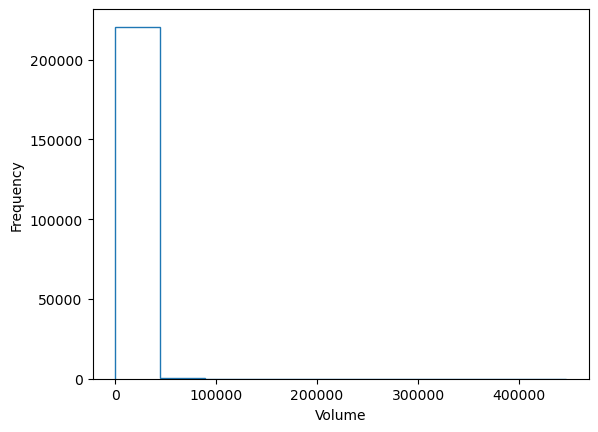

In [28]:
counts, bins = np.histogram(df['volume'])
plt.stairs(counts, bins)
plt.xlabel('Volume')
plt.ylabel('Frequency')

### 2. Numerical Variables Exploration

In [29]:
# List of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('volume')  # Exclude the target variable

# Summary statistics of numerical variables
print(data[numerical_cols].describe())

       adjusted close         strike       call/put            ask  \
count   221046.000000  221046.000000  221046.000000  221046.000000   
mean       435.089149     398.702076       0.500000      41.667365   
std          3.863763      93.725546       0.500001      60.504762   
min        424.970000      25.000000       0.000000       0.010000   
25%        432.930000     349.000000       0.000000       1.660000   
50%        435.460000     411.000000       0.500000      15.910000   
75%        438.510000     454.000000       1.000000      52.550000   
max        441.020000     655.000000       1.000000     416.890000   

                 bid     mean price             iv  open interest  \
count  221046.000000  221046.000000  221046.000000  221046.000000   
mean       40.967420      41.315752       0.234593    1660.743542   
std        59.876656      60.189057       0.225324    6040.663628   
min         0.000000       0.000000      -1.000000       0.000000   
25%         1.500000    

visualize relationships between numerical variables and volume

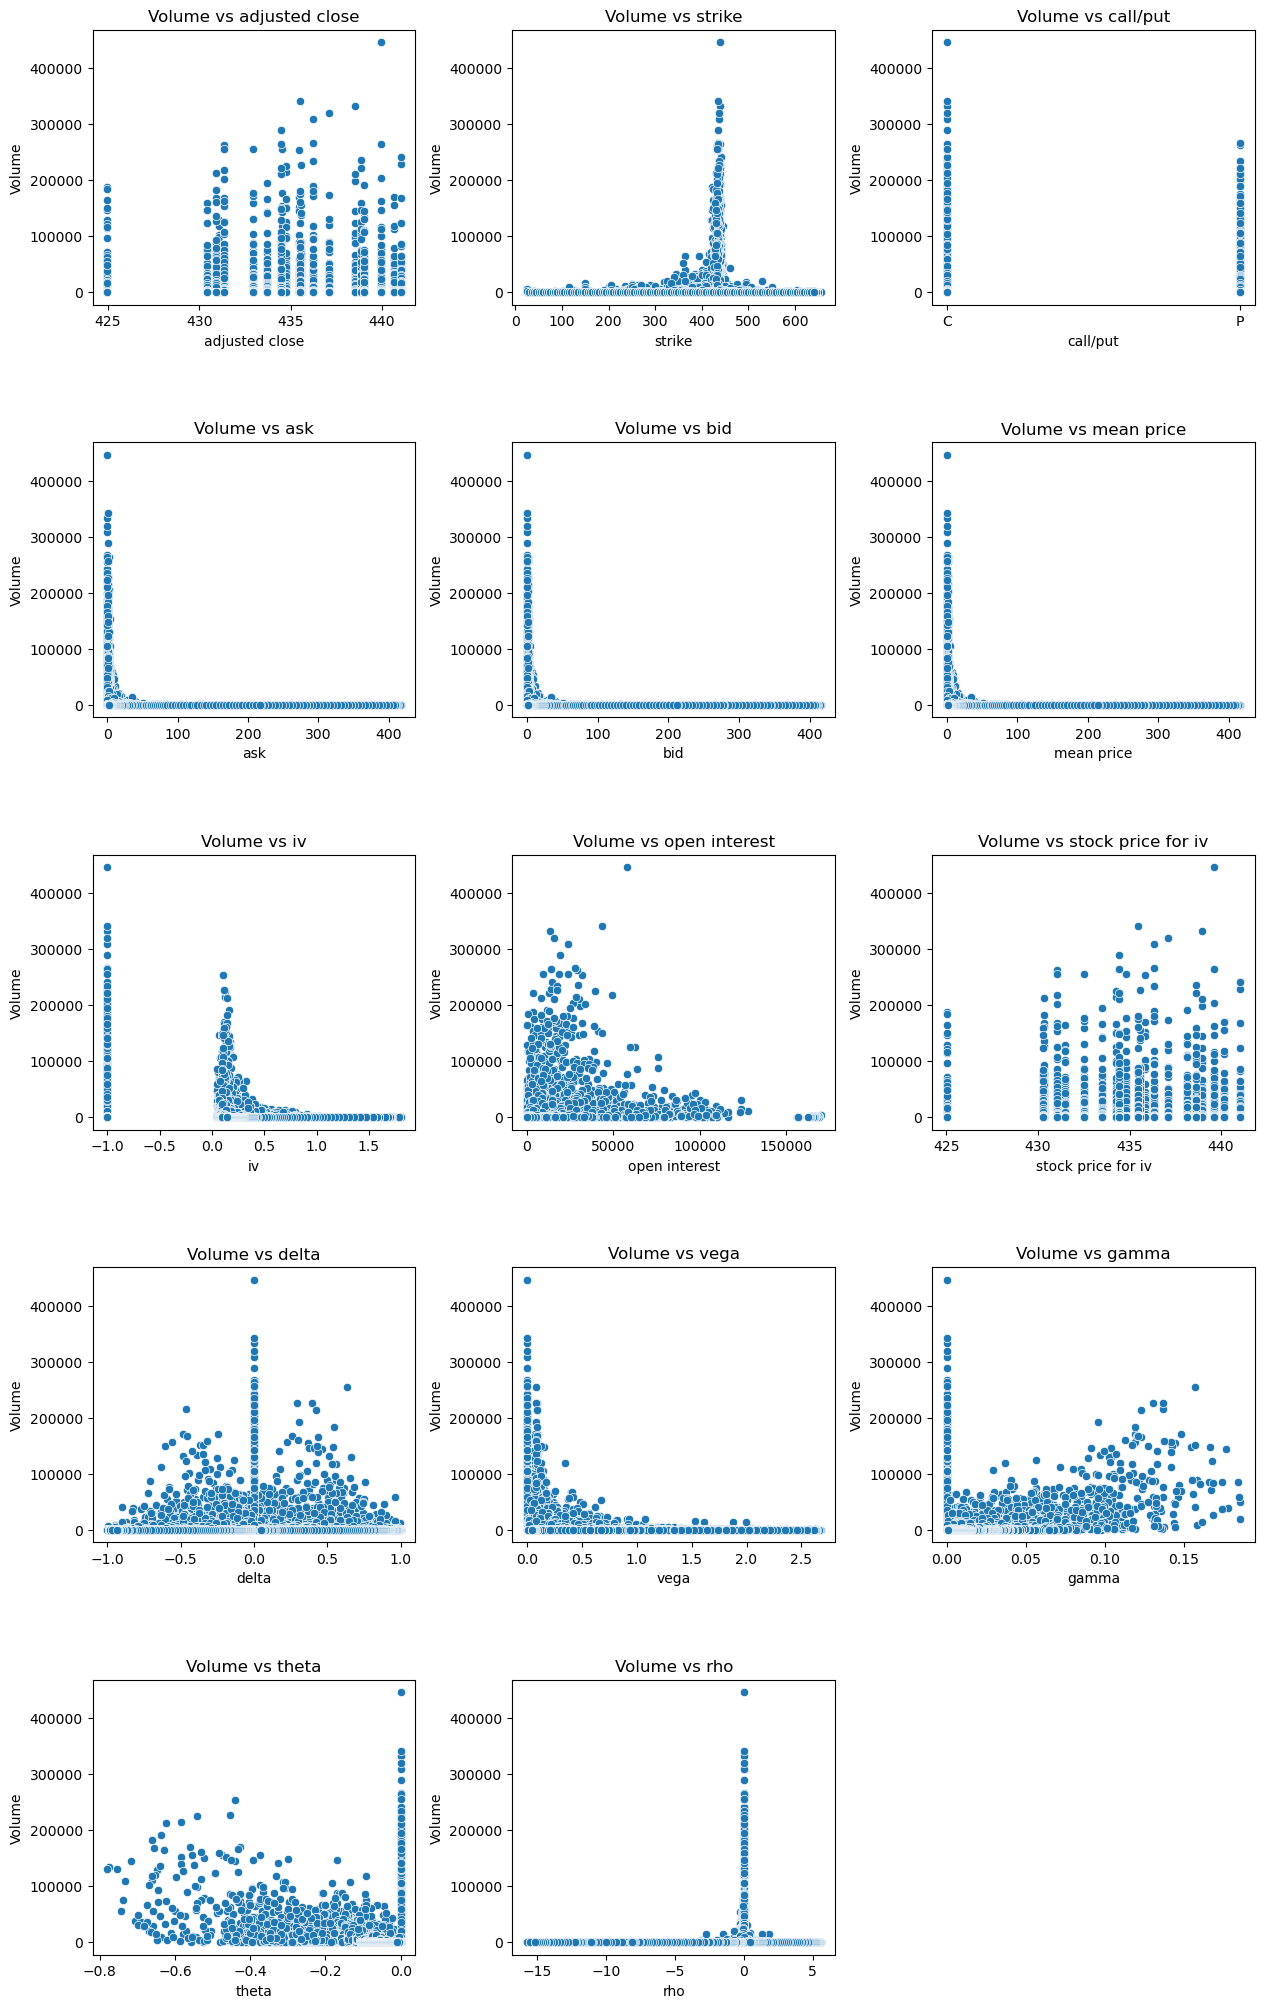

In [30]:
# Number of columns per row
num_cols = 3

# Number of rows needed
num_rows = -(-len(numerical_cols) // num_cols)  # Ceiling division

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable against 'volume'
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df[col], y=df['volume'], ax=axes[i])
    axes[i].set_title(f'Volume vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Volume')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 3. Finding the Correlation Between Variables

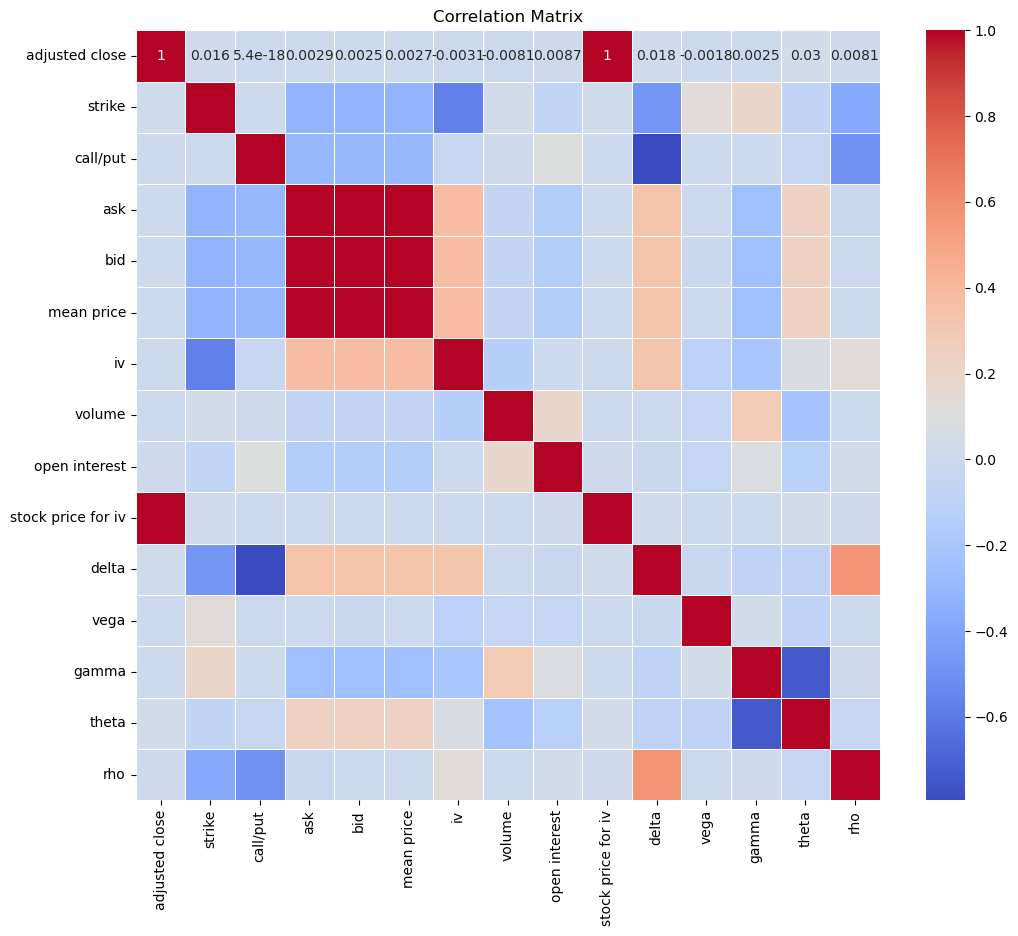

volume                1.000000
gamma                 0.278318
open interest         0.185569
strike                0.023565
call/put              0.009143
rho                   0.002718
adjusted close       -0.008051
stock price for iv   -0.008142
delta                -0.012911
vega                 -0.049532
bid                  -0.051600
mean price           -0.051761
ask                  -0.051920
iv                   -0.126601
theta                -0.226557
Name: volume, dtype: float64


In [31]:
# Correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable
print(correlation_matrix['volume'].sort_values(ascending=False))

### 4. Normalizing Values Using Standard Scaling, Label Encoding, or One-Hot Encoding

In [34]:

# Standard Scaling for numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

### 5. Split the data into train and test subsets

We will split the data using sklearn train_test_split module, assigning 30% of our data into the test split and the rest for the training set.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

NameError: name 'X' is not defined

### 6. Build a machine-learning model

The next step is to build a ML model. As the problem requires make a forecast of our target feature, being that feature a continue numerical variable, the chosen model is a regression algorithm. 

#### Linear regression
From Scikit Learn library we create an instance of the linear regression model:

In [ ]:
reg = linear_model.LinearRegression()

Then, with .fit we can use train the model by adjusting data from X to Y.

LinearRegression will take in its fit method arrays X, y and will store the coefficients 
 of the linear model in its coef_ member:

In [ ]:
reg.fit(X,y)

#Visualize coefficients from the model
reg.coef_

Evaluate the r2_Score metric

In [ ]:
print(r2_score(y, reg(X))

#### Polynomial regression

In [ ]:
mymodel = np.poly1d(np.polyfit(X, y, 3))

Evaluate the model with r2_score

In [ ]:
print(r2_score(y, mymodel(X))

### 7. Perform a cross-validation technique

One way to use cross-validation is to call the cross_val_score function on the estimator and the dataset.

The following code cell estimates the accuracy of a linear regression on our dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time):

In [ ]:
scores = cross_val_score(reg, X, y, cv=5)
scores

## VIII) Data Visualization

# References

* https://scikit-learn.org/stable/modules/linear_model.html
* https://www.w3schools.com/python/python_ml_polynomial_regression.asp
* https://scikit-learn.org/stable/modules/cross_validation.html
